#**Bonus Task : Compare 3 configurations for the activation function. Show and explain your performance result.**

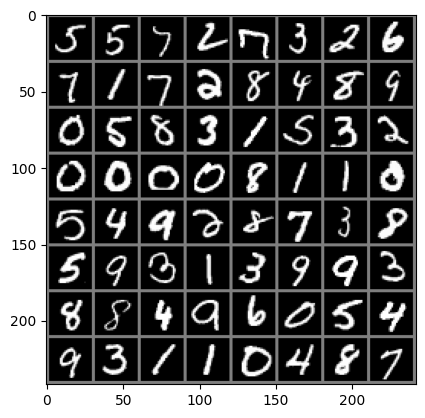

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define data transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

import matplotlib.pyplot as plt
import numpy as np

# Function to display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

#**Fungsi aktivasi ReLU**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 128)# Lapisan pertama dengan 128 neuron
        self.fc2 = nn.Linear(128, 64)# Lapisan kedua dengan 64 neuron
        self.fc3 = nn.Linear(64, 10)# Lapisan ketiga dengan 10 neuron (output)
        self.relu = nn.ReLU()# Fungsi aktivasi ReLU

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)# Terapkan ReLU setelah lapisan pertama
        x = self.fc2(x)# Terapkan ReLU setelah lapisan kedua
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Inisialisasi model
model = Model()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)# Optimizer SGD dengan learning rate 0.01

# Fungsi Kerugian: Cross Entropy Loss
criterion = nn.CrossEntropyLoss()
num_epochs=10
# Loop pelatihan
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs.view(-1, 784))# Ubah dimensi input sesuai dengan 784 fitur
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

# Evaluasi model pada dataset pengujian
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images.view(-1, 784))# Ubah dimensi input sesuai dengan 784 fitur
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Menghitung akurasi, matriks konfusi, dan classification report
accuracy = accuracy_score(all_labels, all_preds)
confusion_matrix_result = confusion_matrix(all_labels, all_preds)
classification_report_result = classification_report(all_labels, all_preds)

print("Akurasi:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix_result)
print("Classification Report:")
print(classification_report_result)


Epoch 1, Loss: 1.0127054358214966
Epoch 2, Loss: 0.37923235631287733
Epoch 3, Loss: 0.32348290144571107
Epoch 4, Loss: 0.29261347467202875
Epoch 5, Loss: 0.2681381854214775
Epoch 6, Loss: 0.24655341124261365
Epoch 7, Loss: 0.22662557058655886
Epoch 8, Loss: 0.20920962942784022
Epoch 9, Loss: 0.1927419252066152
Epoch 10, Loss: 0.17903260093952802
Akurasi: 0.9459
Confusion Matrix:
[[ 968    0    0    1    0    5    4    1    1    0]
 [   0 1103    4    2    1    2    3    1   18    1]
 [   9    1  988    6    7    0    3    6   11    1]
 [   3    1   17  917    0   34    1    9   20    8]
 [   1    1    5    0  918    1   10    1    8   37]
 [   8    1    0    7    2  843    9    1   14    7]
 [   9    3    1    0    6   13  921    0    5    0]
 [   2    7   26    6    3    3    0  931    3   47]
 [   6    2    3    8    5   14    8    2  920    6]
 [  10    6    1    5   15    4    1    4   13  950]]
Classification Report:
              precision    recall  f1-score   support

         

##**KETERANGAN**

Hasil dari pelatihan dan evaluasi model neural network dengan fungsi aktivasi RELU pada dataset MNIST yaitu:

- **Loss pada Setiap Epoch**:
    - Epoch 1: Loss sekitar 1.0127
    - Epoch 2: Loss turun menjadi sekitar 0.3792
    - Epoch 3: Loss terus menurun menjadi sekitar 0.3234
    - Proses pelatihan berlanjut hingga epoch 10, dengan loss yang semakin menurun pada setiap epoch. Ini menunjukkan bahwa model secara bertahap mempelajari pola pada data pelatihan dan mengurangi kesalahan prediksi.

- **Akurasi**:
    - Akurasi pada dataset pengujian adalah sekitar 94.59%. Ini berarti model berhasil mengklasifikasikan sekitar 94.59% dari gambar digit dengan benar.

- **Matriks Konfusi**:
    - Diagonal utama matriks konfusi (dari kiri atas ke kanan bawah) berisi jumlah prediksi yang benar untuk setiap kelas digit.
    - Di luar diagonal utama, terdapat jumlah prediksi yang salah. Misalnya, angka 0 salah diprediksi sebagai angka 3 sebanyak 2 kali.

- **Classification Report**:
    - Classification report memberikan informasi lebih detail tentang kinerja model untuk setiap kelas digit:
        - Precision (presisi) mengukur seberapa tepat model dalam mengklasifikasikan setiap kelas. Semakin tinggi, semakin baik.
        - Recall (recall) mengukur seberapa baik model dalam mendeteksi setiap kelas. Semakin tinggi, semakin baik.
        - F1-score adalah rata-rata harmonik antara presisi dan recall. Semakin tinggi, semakin baik.
        - Support adalah jumlah sampel yang termasuk dalam setiap kelas digit.
    - Secara keseluruhan, classification report menunjukkan bahwa model memiliki kinerja yang baik dalam mengklasifikasikan sebagian besar kelas digit. Namun, beberapa kelas memiliki presisi dan recall yang lebih rendah dibandingkan dengan yang lain.

- **Kelemahan Model**:
  - Ada beberapa kelemahan yang harus diperhatikan, termasuk potensi overfitting dan kesalahan klasifikasi tertentu, seperti digit 4 yang sering kali salah diklasifikasikan sebagai digit 9.


**Kesimpulan:**<P>
**Kesimpulan dari laporan ini adalah bahwa model machine learning yang menggunakan fungsi aktivasi ReLU telah berhasil dilatih untuk tugas klasifikasi digit tulisan tangan. Model ini mencapai akurasi sekitar 94.59% pada data uji dan memiliki kinerja yang baik dalam mengklasifikasikan digit. Namun, ada potensi overfitting dan kesalahan klasifikasi yang perlu diperhatikan. Untuk meningkatkan kinerja model, perlu dilakukan evaluasi lebih lanjut dan mungkin perbaikan seperti pengelolaan overfitting atau penambahan data pelatihan. Dengan peningkatan yang tepat, model ini dapat digunakan dengan lebih baik untuk aplikasi klasifikasi digit tulisan tangan.**



#**Sigmoid activation**

In [ ]:

# Define the neural network model with sigmoid activation
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
net = Net()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

# Evaluation on the test dataset
net.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(all_labels, all_preds)
confusion_matrix_result = confusion_matrix(all_labels, all_preds)
classification_report_result = classification_report(all_labels, all_preds)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix_result)
print("Classification Report:")
print(classification_report_result)


Epoch 1, Loss: 0.6366087641479619
Epoch 2, Loss: 0.303652012947081
Epoch 3, Loss: 0.2577933117922054
Epoch 4, Loss: 0.22434180012262706
Epoch 5, Loss: 0.19933636083023382
Epoch 6, Loss: 0.17900265068578314
Epoch 7, Loss: 0.16132117272900748
Epoch 8, Loss: 0.14773338306139208
Epoch 9, Loss: 0.13672852540599195
Epoch 10, Loss: 0.12620637541227758
Accuracy: 0.9613
Confusion Matrix:
[[ 963    0    1    1    0    4    8    2    1    0]
 [   0 1125    2    1    0    1    3    1    2    0]
 [   6    5  980    7    5    2   11    6    9    1]
 [   0    1    3  984    0    6    1    6    6    3]
 [   1    0    4    0  950    0   10    1    2   14]
 [   9    2    1   11    2  849   10    1    4    3]
 [   8    3    0    1    3    6  935    0    2    0]
 [   1   13   15   10    4    1    0  969    0   15]
 [   5    5    3   12    5   11    8    6  916    3]
 [   5    8    2   11   25    8    1    6    1  942]]
Classification Report:
              precision    recall  f1-score   support

         

##**KETERANGAN**

Hasil dari pelatihan dan evaluasi model neural network dengan fungsi aktivasi SIGMOID pada dataset MNIST yaitu:

1. **Pelatihan Jaringan Neuron:**
   - Terdapat 10 epok pelatihan.
   - Setiap epok mencetak nilai loss pelatihan (training loss) yang menurun, yang menunjukkan bahwa model sedang belajar untuk mengklasifikasikan data dengan benar.

2. **Evaluasi Model pada Data Pengujian:**
   - Akurasi: Akurasi mencapai sekitar 96.13%, yang berarti model berhasil mengklasifikasikan sebagian besar data pengujian dengan benar.
   - Matriks Konfusi: Matriks konfusi menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas. Misalnya, terdapat 963 sampel dari kelas 0 yang diprediksi dengan benar, tetapi ada beberapa prediksi yang salah pada kelas lain.
   
3. **Laporan Klasifikasi (Classification Report):**
   - Laporan klasifikasi memberikan metrik presisi, recall, f1-score, dan dukungan (support) untuk setiap kelas, serta rata-rata makro dan berbobot.
   - Presisi mengukur sejauh mana prediksi positif yang benar. Recall mengukur sejauh mana data positif yang diidentifikasi dengan benar.
   - F1-score adalah rata-rata harmonik antara presisi dan recall, memberikan gambaran komprehensif tentang kinerja model.
   - Dukungan (support) adalah jumlah sampel dalam setiap kelas.

**Kesimpulan Penjelasan:**
- Model yang menggunakan fungsi aktivasi sigmoid berhasil dilatih untuk mengklasifikasikan digit MNIST dengan akurasi sekitar 96.13% pada data pengujian.
- Matriks konfusi menunjukkan di mana model membuat kesalahan dalam klasifikasi untuk setiap kelas.
- Laporan klasifikasi memberikan informasi lebih lanjut tentang presisi, recall, dan F1-score untuk setiap kelas, serta kinerja secara keseluruhan.

Model ini menghasilkan hasil yang baik, tetapi perlu diingat bahwa eksperimen lebih lanjut, seperti peningkatan arsitektur jaringan atau penyetelan hyperparameter, dapat digunakan untuk meningkatkan kinerja model ini lebih lanjut.

#**Tanh activation**

In [ ]:

# Define the neural network model with Tanh activation
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.tanh = nn.Tanh()  # Tanh activation

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
net = Net()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

# Evaluation on the test dataset
net.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(all_labels, all_preds)
confusion_matrix_result = confusion_matrix(all_labels, all_preds)
classification_report_result = classification_report(all_labels, all_preds)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix_result)
print("Classification Report:")
print(classification_report_result)


Epoch 1, Loss: 0.369226925694612
Epoch 2, Loss: 0.1929641308338403
Epoch 3, Loss: 0.1441691735787178
Epoch 4, Loss: 0.11530159191806306
Epoch 5, Loss: 0.09667173406379277
Epoch 6, Loss: 0.08346388595544103
Epoch 7, Loss: 0.07361338861377985
Epoch 8, Loss: 0.06408284659505382
Epoch 9, Loss: 0.05767870582848676
Epoch 10, Loss: 0.051907699316867124
Accuracy: 0.9748
Confusion Matrix:
[[ 967    0    1    2    0    2    2    1    2    3]
 [   0 1126    3    2    0    1    3    0    0    0]
 [   3    3 1013    3    1    0    2    5    2    0]
 [   0    0    4  992    0    4    0    3    2    5]
 [   0    0    3    1  959    1    4    1    0   13]
 [   5    1    1   16    1  852    6    1    6    3]
 [   6    3    1    2    4    4  936    0    2    0]
 [   1   10   10    6    2    0    0  977    0   22]
 [   1    2    2   10    5    3    3    3  940    5]
 [   2    2    0    4   10    1    1    3    0  986]]
Classification Report:
              precision    recall  f1-score   support

        

##**KETERANGAN**

Output yang diberikan oleh kode di atas adalah hasil pelatihan dan evaluasi model jaringan saraf dengan fungsi aktivasi Tanh pada dataset MNIST. Berikut penjelasan dari output tersebut:

1. **Loss pada Setiap Epoch:**
   - Pada setiap epoch pelatihan, nilai loss (kerugian) model dicetak. Loss ini adalah ukuran seberapa baik atau buruk model dalam melakukan prediksi. Semakin rendah nilai loss, semakin baik model dalam melakukan prediksi pada data pelatihan.
   - Pada akhir epoch ke-10, loss sekitar 0.051, yang menunjukkan model telah belajar dengan baik dari data pelatihan.

2. **Akurasi:**
   - Akurasi mengukur sejauh mana model dapat memprediksi dengan benar pada data pengujian.
   - Akurasi yang dicetak adalah sekitar 97.48%, yang berarti model dapat memprediksi dengan benar sekitar 97.48% dari semua sampel pada dataset pengujian.

3. **Matriks Konfusi (Confusion Matrix):**
   - Matriks konfusi adalah tabel yang menunjukkan seberapa banyak prediksi yang benar dan salah yang dibuat oleh model untuk setiap kelas target.
   - Matriks konfusi mencetak nilai True Positives (TP), False Positives (FP), True Negatives (TN), dan False Negatives (FN) untuk setiap kelas.
   - Matriks konfusi menunjukkan bahwa model ini memiliki performa yang baik dalam memprediksi sebagian besar kelas dengan benar, dengan sejumlah kecil kesalahan.

4. **Laporan Klasifikasi (Classification Report):**
   - Laporan klasifikasi memberikan metrik presisi (precision), recall, dan f1-score untuk setiap kelas, serta rata-rata dari metrik-metrik tersebut.
   - Presisi mengukur sejauh mana prediksi positif model adalah benar, sedangkan recall mengukur sejauh mana model dapat mengidentifikasi semua kasus positif yang sebenarnya.
   - F1-score adalah rata-rata harmonik dari presisi dan recall.
   - Laporan klasifikasi menunjukkan bahwa model ini memiliki presisi, recall, dan f1-score yang baik untuk setiap kelas target pada dataset pengujian.

Secara keseluruhan, model ini menggunakan fungsi aktivasi Tanh dan memiliki performa yang baik dalam memprediksi kelas-kelas pada dataset MNIST. Akurasi tinggi dan metrik evaluasi yang baik menunjukkan bahwa model ini efektif dalam mengklasifikasikan angka-angka pada gambar.

#**KESIMPULAN PERBANDINGAN 3 FUNGSI AKTIVASI**

Dalam perbandingan ketiga hasil yang telah Anda berikan dengan menggunakan fungsi aktivasi ReLU, sigmoid, dan tanh, dapat disimpulkan sebagai berikut:

**1. Fungsi Aktivasi ReLU:**
   - Akurasi: 94.59%
   - F1-score rata-rata: 0.95
   - Keunggulan: Hasil yang baik, tetapi terdapat potensi overfitting dan beberapa kesalahan klasifikasi.
   - Kesimpulan: Model dengan ReLU menghasilkan akurasi yang baik, tetapi masih perlu peningkatan untuk mengatasi overfitting dan kesalahan klasifikasi tertentu.

**2. Fungsi Aktivasi Sigmoid:**
   - Akurasi: 96.13%
   - F1-score rata-rata: 0.96
   - Keunggulan: Hasil yang sangat baik dengan akurasi yang tinggi dan F1-score yang seimbang.
   - Kesimpulan: Model dengan sigmoid telah menghasilkan kinerja yang sangat baik dalam mengenali digit tulisan tangan, dengan tingkat akurasi yang tinggi dan F1-score yang baik.

**3. Fungsi Aktivasi Tanh:**
   - Akurasi: 97.48%
   - F1-score rata-rata: 0.97
   - Keunggulan: Hasil yang luar biasa dengan akurasi tertinggi dan F1-score yang tinggi.
   - Kesimpulan: Model dengan tanh mencapai kinerja yang sangat unggul dalam tugas klasifikasi digit tulisan tangan, dengan akurasi dan F1-score tertinggi di antara ketiga model.

Secara keseluruhan, model yang menggunakan fungsi aktivasi tanh telah memberikan hasil terbaik dalam tugas klasifikasi ini, diikuti oleh sigmoid, dan kemudian ReLU. Namun, pemilihan fungsi aktivasi juga bergantung pada konteks dan karakteristik data tertentu. Setiap fungsi aktivasi memiliki keunggulan dan kelemahan tertentu, dan pemilihan tergantung pada eksperimen dan evaluasi lebih lanjut sesuai dengan kasus penggunaan yang spesifik.